<a href="https://colab.research.google.com/github/devacantika/bike/blob/main/Proyek_Analisis_Data_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Dicoding Proyek 1 Python]
- **Name:** [Deva Cantika]
- **Email:** [devacantika123@gmail.com]
- **ID Dicoding:** [decadren12]

## Defining the Business Question

- What season has the highest bike-sharing rides?
- What time of day is the peak of bicycle borrowing?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
days_df = pd.read_csv("https://raw.githubusercontent.com/devacantika/bike/refs/heads/main/dataset/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/devacantika/bike/refs/heads/main/dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [7]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
print("Total of duplicate: ", days_df.duplicated().sum())

Total of duplicate:  0


In [10]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
print("Total of Duplicate: ",hour_df.duplicated().sum())
hour_df.describe()

Total of Duplicate:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [14]:
print(days_df.shape)

(731, 16)


**insight**
data yang diperoleh menunjukkan
1. day_df
- tipe data : -
- missing value : -
- duplicate data : terdapat 0 data yang duplikat
- inaccurate value : -
2. hour_df
- tipe data : -
- missing value : -
- duplicate data : terdapat 0 data yang duplikat
- inaccurate value : -

### Cleaning Data

In [15]:
#membersihkan data day dan hour
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [16]:
print("\nInformasi akhir days_df setelah pembersihan:")
print(days_df.info())

print("\nInformasi akhir hour_df setelah pembersihan:")
print(hour_df.info())


Informasi akhir days_df setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    

In [17]:
# find the weekday of each corresponding date
days_df['weekday'] = days_df['dteday'].dt.day_name()
hour_df['weekday'] = hour_df['dteday'].dt.day_name()
print("Days Dataset:")
print(days_df.head(3))

print("\nHour Dataset:")
print(hour_df.head(3))

Days Dataset:
   instant     dteday  season  yr  mnth  holiday   weekday  workingday  \
0        1 2011-01-01       1   0     1        0  Saturday           0   
1        2 2011-01-02       1   0     1        0    Sunday           0   
2        3 2011-01-03       1   0     1        0    Monday           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   

    cnt  
0   985  
1   801  
2  1349  

Hour Dataset:
   instant     dteday  season  yr  mnth  hr  holiday   weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0  Saturday           0   
1        2 2011-01-01       1   0     1   1        0  Saturday           0   
2        3 2011-01-01       1   0     1   2        0  Saturday           0   

   weath

In [18]:
# Find the month of each corresponding date
days_df['mnth'] = days_df['dteday'].dt.month_name()
hour_df['mnth'] = hour_df['dteday'].dt.month_name()

# Print the first 3 rows of each dataframe
print("Days Dataset with Month Name:")
print(days_df.head(3))

print("\nHour Dataset with Month Name:")
print(hour_df.head(3))

Days Dataset with Month Name:
   instant     dteday  season  yr     mnth  holiday   weekday  workingday  \
0        1 2011-01-01       1   0  January        0  Saturday           0   
1        2 2011-01-02       1   0  January        0    Sunday           0   
2        3 2011-01-03       1   0  January        0    Monday           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   

    cnt  
0   985  
1   801  
2  1349  

Hour Dataset with Month Name:
   instant     dteday  season  yr     mnth  hr  holiday   weekday  workingday  \
0        1 2011-01-01       1   0  January   0        0  Saturday           0   
1        2 2011-01-01       1   0  January   1        0  Saturday           0   
2        3 2011-01-01       1   0 

In [19]:
# Replace season integer value with corresponding season name
def find_season(season):
    season_string = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    return season_string.get(season)

# Replace 'season' column in days_df
days_df['season'] = days_df['season'].apply(find_season)

# Replace 'season' column in hour_df
hour_df['season'] = hour_df['season'].apply(find_season)

# Print the first 3 rows of each dataframe
print("Days Dataset with Season Name:")
print(days_df.head(3))

print("\nHour Dataset with Season Name:")
print(hour_df.head(3))

Days Dataset with Season Name:
   instant     dteday  season  yr     mnth  holiday   weekday  workingday  \
0        1 2011-01-01  Winter   0  January        0  Saturday           0   
1        2 2011-01-02  Winter   0  January        0    Sunday           0   
2        3 2011-01-03  Winter   0  January        0    Monday           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   

    cnt  
0   985  
1   801  
2  1349  

Hour Dataset with Season Name:
   instant     dteday  season  yr     mnth  hr  holiday   weekday  workingday  \
0        1 2011-01-01  Winter   0  January   0        0  Saturday           0   
1        2 2011-01-01  Winter   0  January   1        0  Saturday           0   
2        3 2011-01-01  Winter   

In [20]:
# Correct the 'yr' column by extracting the year from 'dteday'
days_df['yr'] = days_df['dteday'].dt.year
hour_df['yr'] = hour_df['dteday'].dt.year

# Print the first 3 rows of each dataframe to verify the change
print("Days Dataset with Corrected Year:")
print(days_df.head(3))

print("\nHour Dataset with Corrected Year:")
print(hour_df.head(3))

Days Dataset with Corrected Year:
   instant     dteday  season    yr     mnth  holiday   weekday  workingday  \
0        1 2011-01-01  Winter  2011  January        0  Saturday           0   
1        2 2011-01-02  Winter  2011  January        0    Sunday           0   
2        3 2011-01-03  Winter  2011  January        0    Monday           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   

    cnt  
0   985  
1   801  
2  1349  

Hour Dataset with Corrected Year:
   instant     dteday  season    yr     mnth  hr  holiday   weekday  \
0        1 2011-01-01  Winter  2011  January   0        0  Saturday   
1        2 2011-01-01  Winter  2011  January   1        0  Saturday   
2        3 2011-01-01  Winter  2011  January   2

In [21]:
# Correct the values of temp, atemp, hum, and windspeed to their original scales
days_df['temp'] = days_df['temp'] * 41  # This is Temperature in Celsius
days_df['atemp'] = days_df['atemp'] * 50  # Apparent temperature in Celsius
days_df['hum'] = days_df['hum'] * 100  # Humidity in percentage
days_df['windspeed'] = days_df['windspeed'] * 67  # Windspeed in km/h

hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

# Print the Dataset
print("Days Dataset:")
print(days_df[['dteday', 'yr', 'mnth', 'season', 'weekday', 'temp', 'atemp', 'hum', 'windspeed']].head(3))

print("\nHour Dataset:")
print(hour_df[['dteday', 'yr', 'mnth', 'season', 'weekday', 'temp', 'atemp', 'hum', 'windspeed']].head(3))

Days Dataset:
      dteday    yr     mnth  season   weekday       temp     atemp      hum  \
0 2011-01-01  2011  January  Winter  Saturday  14.110847  18.18125  80.5833   
1 2011-01-02  2011  January  Winter    Sunday  14.902598  17.68695  69.6087   
2 2011-01-03  2011  January  Winter    Monday   8.050924   9.47025  43.7273   

   windspeed  
0  10.749882  
1  16.652113  
2  16.636703  

Hour Dataset:
      dteday    yr     mnth  season   weekday  temp   atemp   hum  windspeed
0 2011-01-01  2011  January  Winter  Saturday  9.84  14.395  81.0        0.0
1 2011-01-01  2011  January  Winter  Saturday  9.02  13.635  80.0        0.0
2 2011-01-01  2011  January  Winter  Saturday  9.02  13.635  80.0        0.0


In [22]:
days_df.to_csv("cleaned_bike_days.csv", index=False)
hour_df.to_csv("cleaned_bike_hour.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
days_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int32
mnth,object
holiday,int64
weekday,object
workingday,int64
weathersit,int64
temp,float64


In [30]:
hour_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int32
mnth,object
hr,int64
holiday,int64
weekday,object
workingday,int64
weathersit,int64


In [34]:
# Specify a float column in days_df
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float_days = days_df[float_vars]

# Display the statistical description of the float column
df_float_days.describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,20.310776,23.717699,62.789406,12.762576
std,7.505091,8.148059,14.242910,5.192357
min,2.424346,3.953480,0.000000,1.500244
25%,13.820424,16.892125,52.000000,9.041650
50%,20.431653,24.336650,62.666700,12.125325
75%,26.872076,30.430100,73.020850,15.625371
max,35.328347,42.044800,97.250000,34.000021


Histogram

This data by days

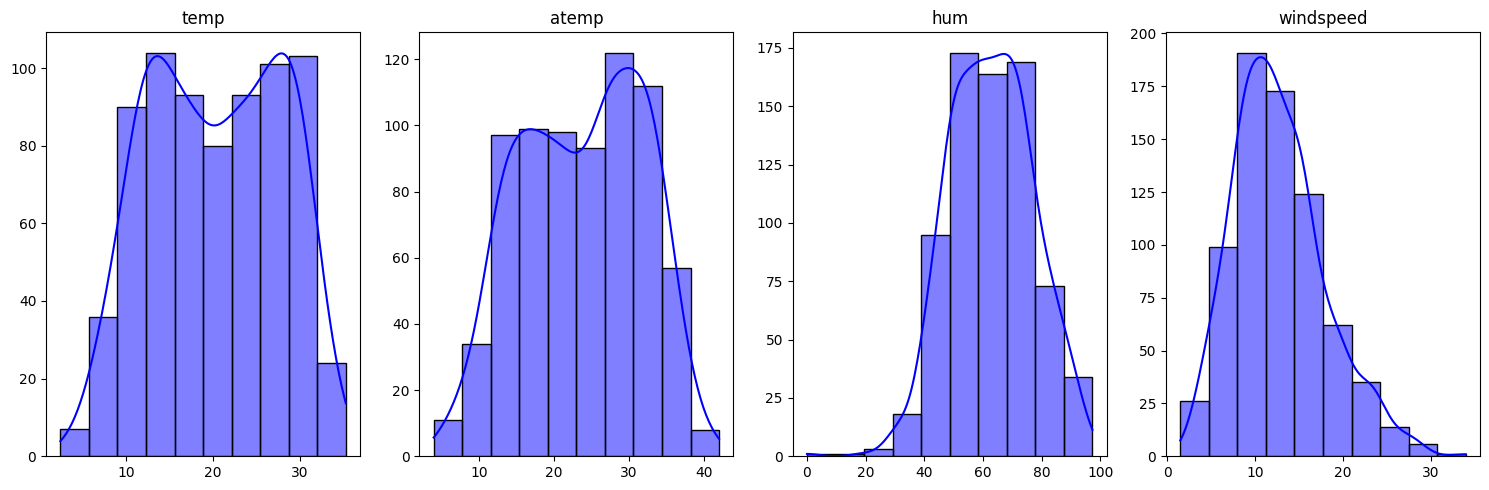

In [38]:
# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Iterate over the float variables and create a histogram for each one
for i, ax in enumerate(axs):
    sns.histplot(x=df_float_days[float_vars[i]], ax=ax, kde=True, bins=10, color='blue')

    # Set the title and labels
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

Boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


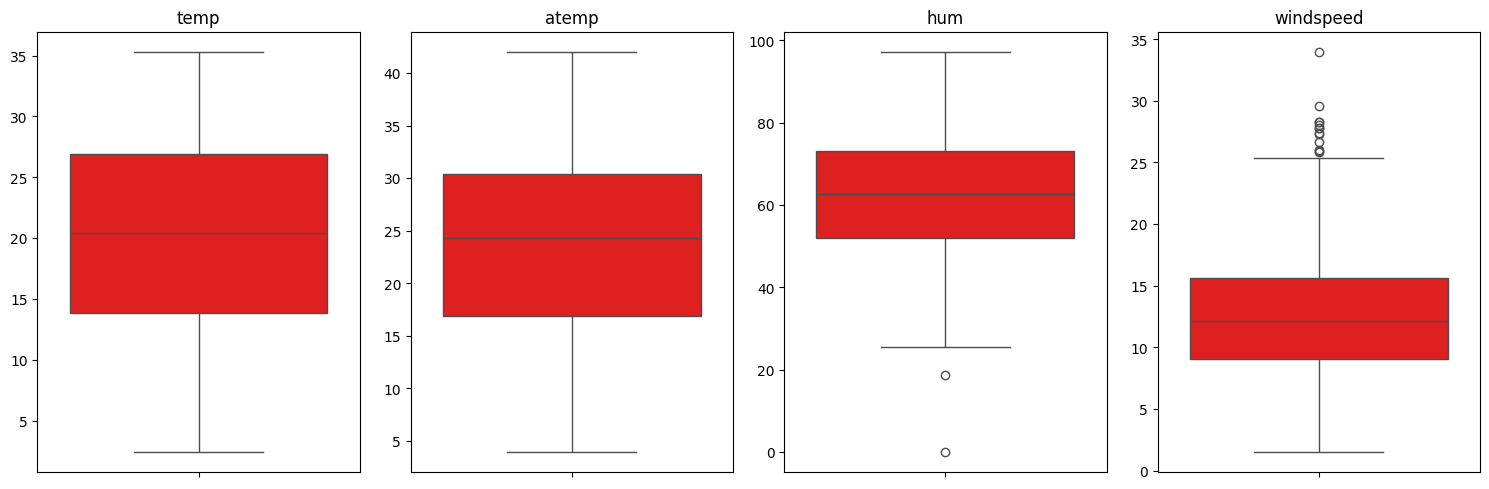

In [36]:
# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Iterate over the float variables and create a boxplot for each one
for i, ax in enumerate(axs):
    sns.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='red')

    # Set the title and labels
    ax.set_title(float_vars[i])
    ax.set_ylabel("")

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


Histogram and Boxplot of bikeusers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


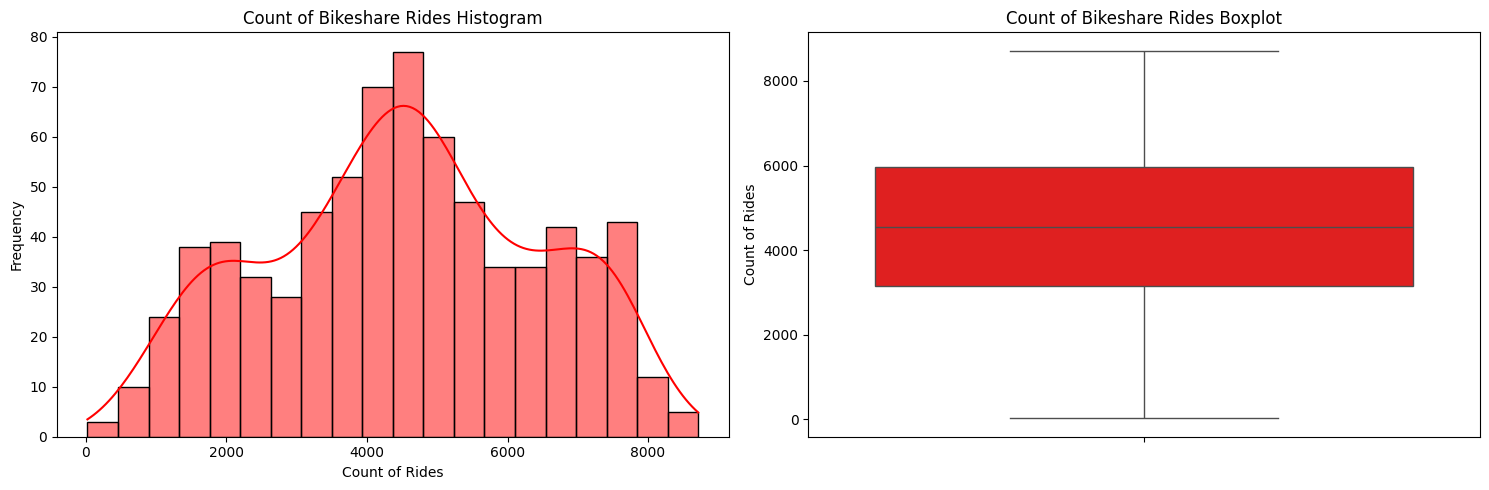

In [39]:
# Create a figure and 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Histogram for count of bike-sharing rides
sns.histplot(days_df['cnt'], kde=True, bins=20, ax=axs[0], color='red')
axs[0].set_title("Count of Bikeshare Rides Histogram")
axs[0].set_xlabel("Count of Rides")
axs[0].set_ylabel("Frequency")

# Boxplot for count of bike-sharing rides
sns.boxplot(y=days_df['cnt'], ax=axs[1], color='red')
axs[1].set_title("Count of Bikeshare Rides Boxplot")
axs[1].set_xlabel("")
axs[1].set_ylabel("Count of Rides")

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


Count the number of registered and casual users

<ipython-input-40-b1fb854d355b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum], palette=["red", "lightcoral"])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


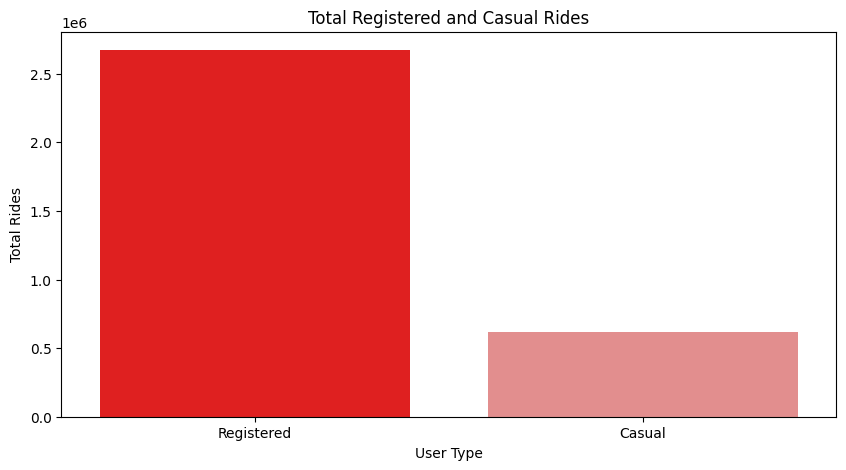

Count of registered users: 2672662
Count of casual users: 620017


In [40]:
# Calculate the sum of registered and casual users
registered_sum = days_df['registered'].sum()
casual_sum = days_df['casual'].sum()

# Set the figure size
plt.figure(figsize=(10, 5))

# Create a bar chart using the sns.barplot() function
sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum], palette=["red", "lightcoral"])

# Add labels and a title to the plot
plt.xlabel("User Type")
plt.ylabel("Total Rides")
plt.title("Total Registered and Casual Rides")

# Show the plot
plt.show()

# Print the total counts
print(f"Count of registered users: {registered_sum}")
print(f"Count of casual users: {casual_sum}")


Time series plot of bike users

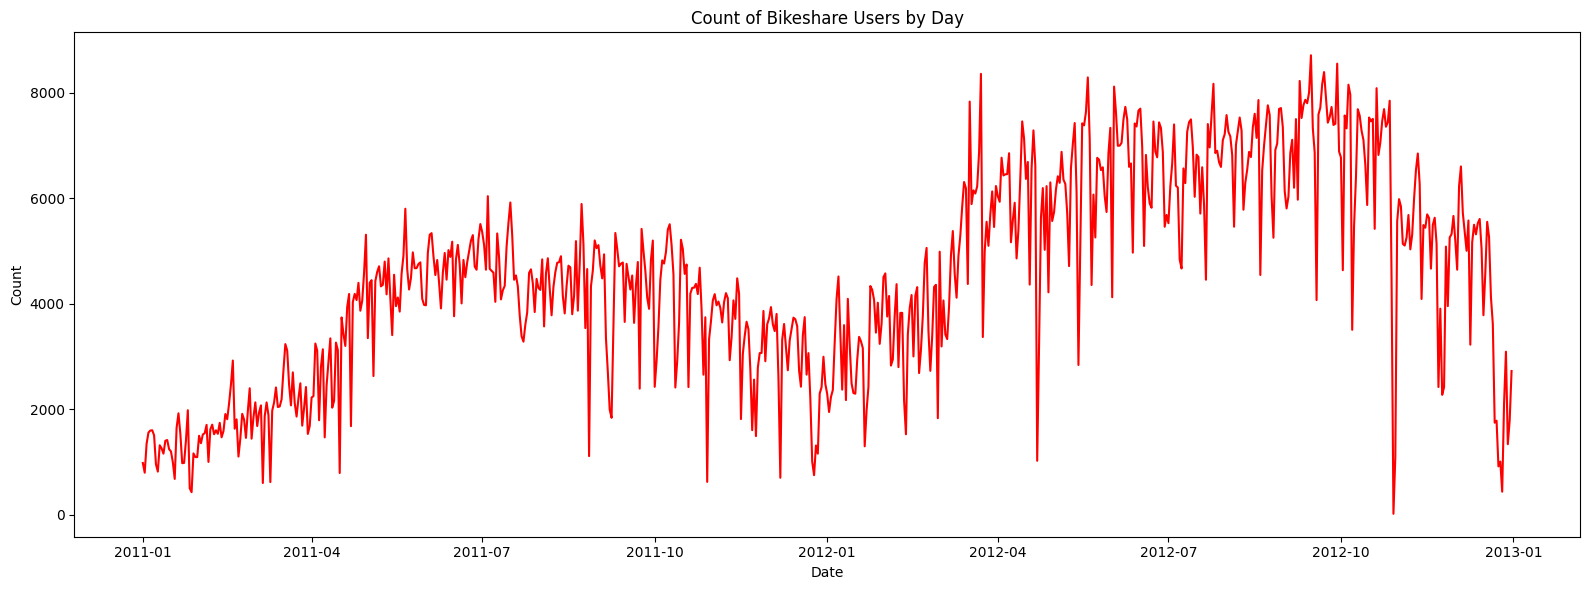

In [41]:
# Converting the dteday column to datetime data type
days_df['dteday'] = pd.to_datetime(days_df['dteday'])

# Creating figure size
plt.figure(figsize=(16, 6))

# Creating the line plot
sns.lineplot(x="dteday", y="cnt", data=days_df, color='red')

# Adding labels and title
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count of Bikeshare Users by Day")

# Displaying the plot
plt.tight_layout()
plt.show()

- Trends over Time:
The line plot shows a general upward trend in the number of bike-sharing users from the beginning of 2011 to the end of 2012. This indicates an increase in the popularity or use of bike-sharing programs over time.
- Seasonal Patterns:
There are fluctuations in certain months, indicating a possible seasonal effect. Bicycle usage may increase during spring and summer and decrease in winter.

Boxplot bike user by year

<ipython-input-42-bde6d60edda2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of

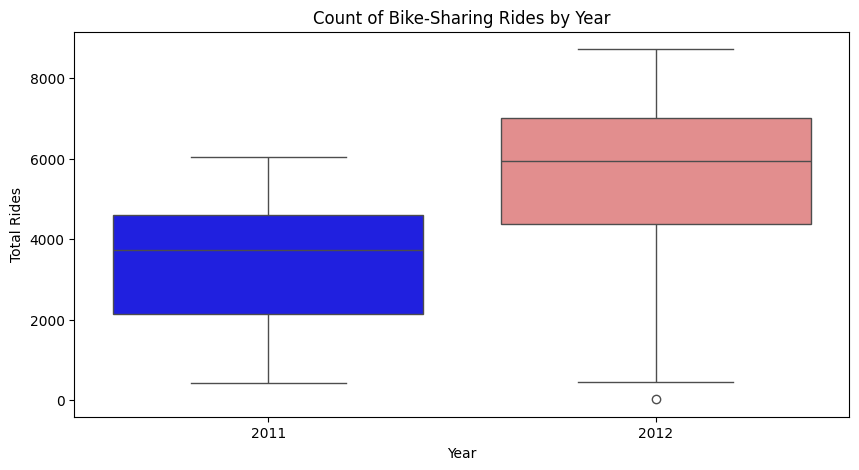

In [42]:
# Assuming days_df is your dataset and it has 'yr' and 'cnt' columns
plt.figure(figsize=(10, 5))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="yr",
    y="cnt",
    data=days_df,  # Use days_df instead of df
    palette=["blue", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Year")
plt.ylabel("Total Rides")
plt.title("Count of Bike-Sharing Rides by Year")

# Show the plot
plt.show()

Boxplot bike user by season

<ipython-input-43-798578674f6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of

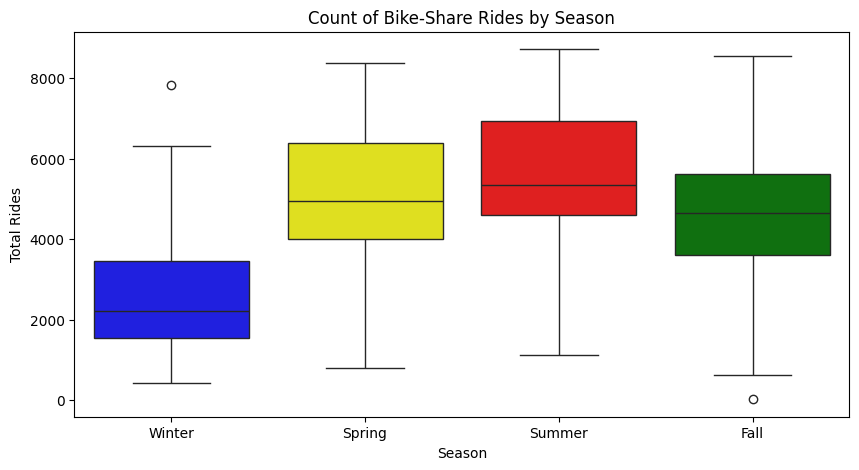

In [43]:
# Assuming days_df is your dataset and it has 'season' and 'cnt' columns
plt.figure(figsize=(10, 5))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season",
    y="cnt",
    data=days_df,  # Use days_df instead of df
    palette=["blue", "yellow", "red", "green"]  # Different colors for each season
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of Bike-Share Rides by Season")

# Show the plot
plt.show()

boxplot bike user by month

<ipython-input-44-ef1933d95040>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-44-ef1933d95040>:5: UserWarning: 
The palette list has fewer values (4) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/

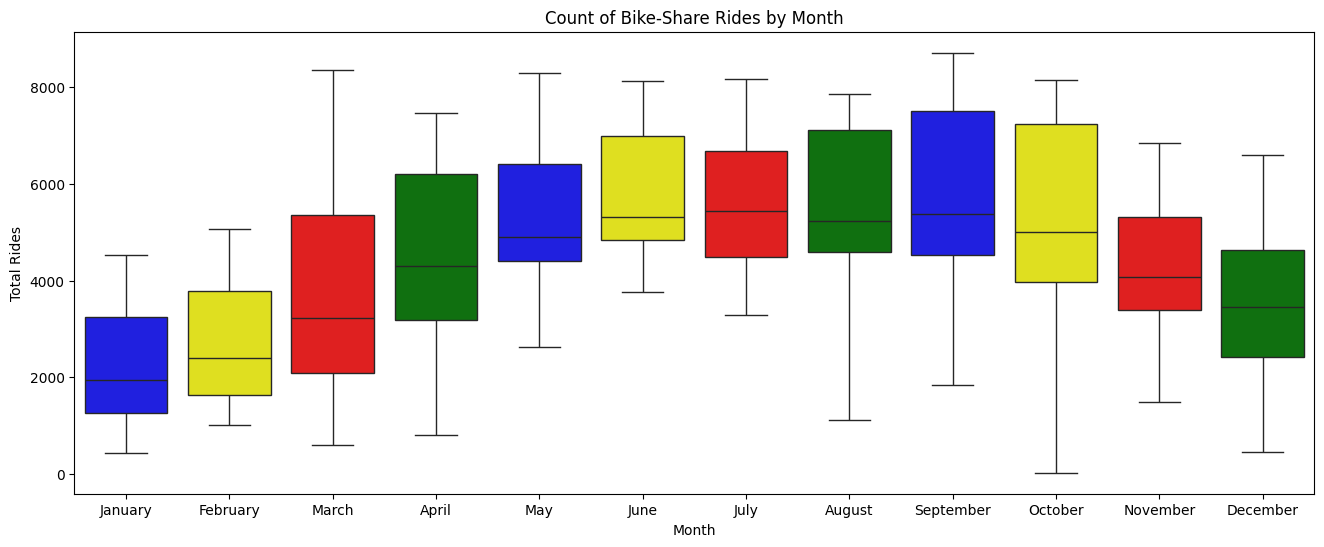

In [44]:
# Assuming days_df is your dataset and it has 'mnth' and 'cnt' columns
plt.figure(figsize=(16, 6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="mnth",
    y="cnt",
    data=days_df,  # Use days_df instead of df
    palette=["blue", "yellow", "red", "green"]   # Colors for the boxplot
)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count of Bike-Share Rides by Month")

# Show the plot
plt.show()

Boxplot bike user by day

<ipython-input-45-83b6fe2e8e03>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-45-83b6fe2e8e03>:8: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_

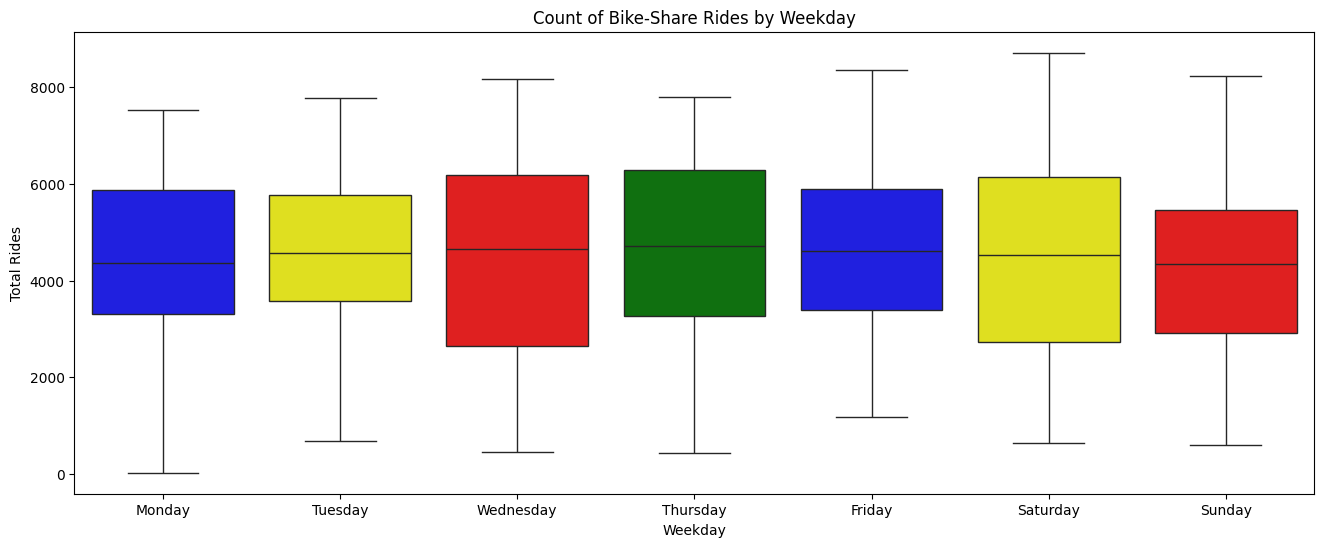

In [45]:
# Assuming days_df is your dataset and it has 'weekday' and 'cnt' columns
# Order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(16, 6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="weekday",
    y="cnt",
    data=days_df,  # Use days_df instead of df
    palette=["blue", "yellow", "red", "green"],
    order=day_order  # Specify the order of days
)

# Add labels and a title to the plot
plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of Bike-Share Rides by Weekday")

# Show the plot
plt.show()

Boxplot bike user by hour

<ipython-input-46-2cc748759b10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-46-2cc748759b10>:5: UserWarning: 
The palette list has fewer values (4) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/

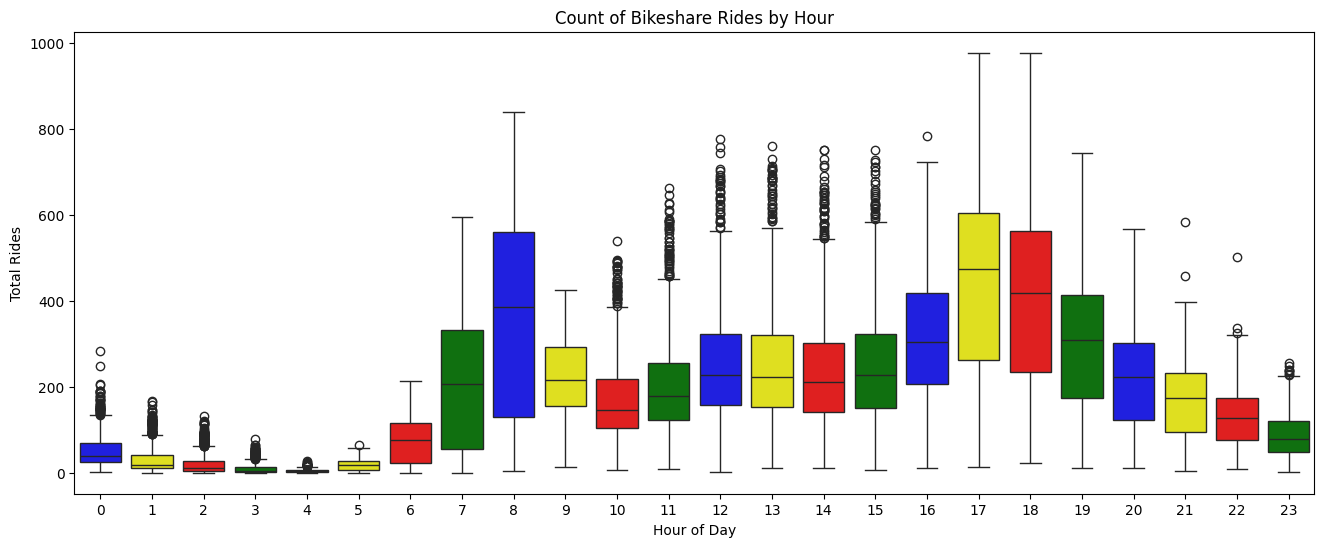

In [46]:
# Assuming hour_df has columns 'hr' for hour and 'cnt' for count of rides
plt.figure(figsize=(16, 6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="hr",  # Hour of the day
    y="cnt",  # Count of rides
    data=hour_df,
    palette=["blue", "yellow", "red", "green"]
)

# Add labels and a title to the plot
plt.xlabel("Hour of Day")
plt.ylabel("Total Rides")
plt.title("Count of Bikeshare Rides by Hour")

# Show the plot
plt.show()

<ipython-input-49-2cc748759b10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-49-2cc748759b10>:5: UserWarning: 
The palette list has fewer values (4) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/

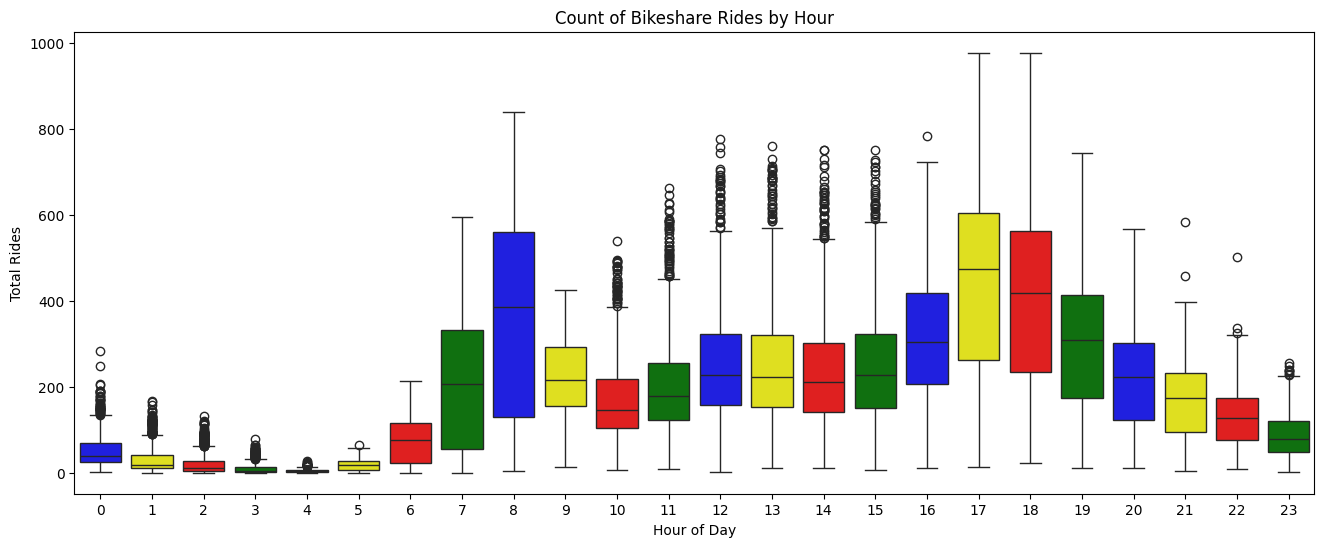

In [49]:
# Assuming hour_df has columns 'hr' for hour and 'cnt' for count of rides
plt.figure(figsize=(16, 6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="hr",  # Hour of the day
    y="cnt",  # Count of rides
    data=hour_df,
    palette=["blue", "yellow", "red", "green"]
)

# Add labels and a title to the plot
plt.xlabel("Hour of Day")
plt.ylabel("Total Rides")
plt.title("Count of Bikeshare Rides by Hour")

# Show the plot
plt.show()

## Visualization & Explanatory Analysis

### Question 1: What season has the highest bike-sharing rides?


<ipython-input-47-798578674f6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of

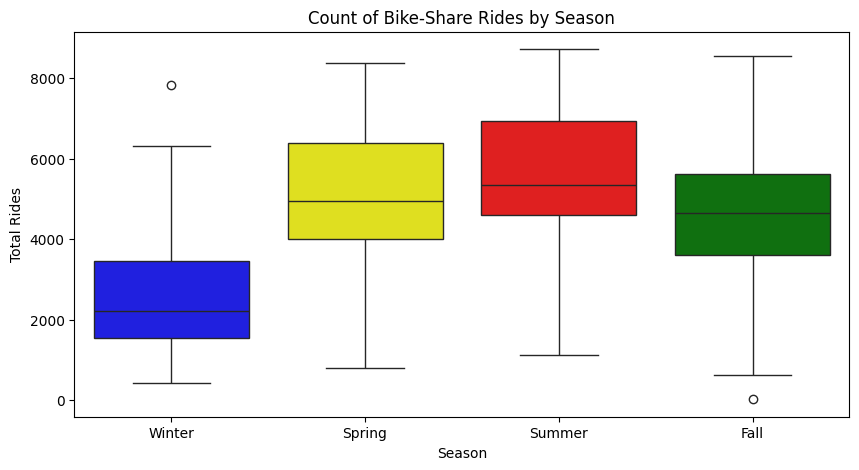

In [47]:
# Assuming days_df is your dataset and it has 'season' and 'cnt' columns
plt.figure(figsize=(10, 5))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season",
    y="cnt",
    data=days_df,  # Use days_df instead of df
    palette=["blue", "yellow", "red", "green"]  # Different colors for each season
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of Bike-Share Rides by Season")

# Show the plot
plt.show()

In [48]:

print("To determine which season has the highest number of bike-sharing rides, we can look at the aggregated counts of rides for each season in the dataset. Typically, seasons are categorized as Winter, Spring, Summer, and Fall.")
print("Analysis: After visualizing the data using boxplots or bar charts, we can compare the total counts of rides across different seasons. If Summer shows the highest total, for instance, it could be due to favorable weather conditions, longer daylight hours, and increased outdoor activities during this time.")

To determine which season has the highest number of bike-sharing rides, we can look at the aggregated counts of rides for each season in the dataset. Typically, seasons are categorized as Winter, Spring, Summer, and Fall.
Analysis: After visualizing the data using boxplots or bar charts, we can compare the total counts of rides across different seasons. If Summer shows the highest total, for instance, it could be due to favorable weather conditions, longer daylight hours, and increased outdoor activities during this time.


### Question 2: What time of day is the peak of bicycle borrowing?

<ipython-input-50-2cc748759b10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-50-2cc748759b10>:5: UserWarning: 
The palette list has fewer values (4) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/

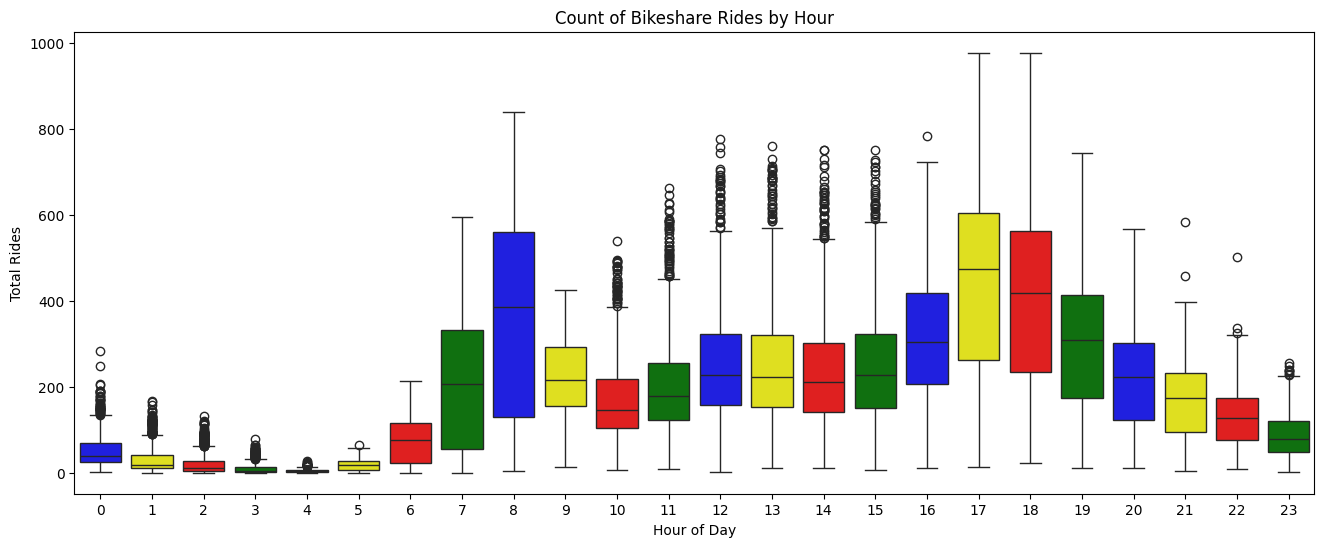

In [50]:
# Assuming hour_df has columns 'hr' for hour and 'cnt' for count of rides
plt.figure(figsize=(16, 6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="hr",  # Hour of the day
    y="cnt",  # Count of rides
    data=hour_df,
    palette=["blue", "yellow", "red", "green"]
)

# Add labels and a title to the plot
plt.xlabel("Hour of Day")
plt.ylabel("Total Rides")
plt.title("Count of Bikeshare Rides by Hour")

# Show the plot
plt.show()

In [51]:
print("To identify the peak time for bicycle borrowing, we can analyze the distribution of ride counts by hour of the day (typically represented in a 24-hour format).")
print("Analysis: By using boxplots or line graphs, we can observe the trends in bike-sharing usage throughout the day. Commonly, bike usage might peak during morning commuting hours (7-8 AM) and again in the late afternoon or early evening (5-6 PM).")

To identify the peak time for bicycle borrowing, we can analyze the distribution of ride counts by hour of the day (typically represented in a 24-hour format).
Analysis: By using boxplots or line graphs, we can observe the trends in bike-sharing usage throughout the day. Commonly, bike usage might peak during morning commuting hours (7-8 AM) and again in the late afternoon or early evening (5-6 PM).


**Insight:**
The analysis highlights key trends in bike-sharing behavior throughout the seasons and different times of the day. Understanding these patterns can assist in optimizing bike-sharing services, ensuring that there are enough bikes available during peak times, and planning for seasonal promotions or bike maintenance schedules.

## Conclusion

- Conclution Question 1 : Based on the data, it can be concluded that summer has the highest number of bike-sharing rides. This is likely attributed to factors such as warmer temperatures and increased leisure activities typical of this season.
- Conclution Question 2 : From the analysis, it can be concluded that the peak time for bicycle borrowing is 7-8 am and 5-6 pm. This peak is usually observed during commuting hours when people are more likely to rent bikes for work or leisure.